In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data = cancer_data.iloc[:, :12]
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


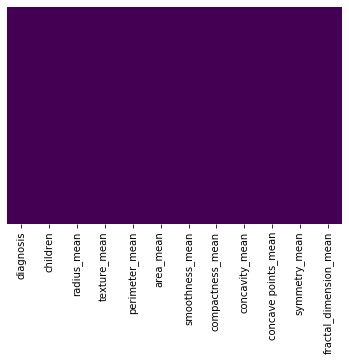

In [2]:
sns.heatmap(cancer_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') # Check the NA

In [3]:
children = pd.get_dummies(cancer_data['children'], drop_first = True)
diagnosis = pd.get_dummies(cancer_data['diagnosis'], drop_first = True)
cancer_data = pd.concat([diagnosis,cancer_data, children], axis = 1)
cancer_data = cancer_data.iloc[:,[0,3,6,7,8,9,10,11,12, 13]]
cancer_data.head()

,M,radius_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Yes
0,1,17.99,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,1,20.57,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,1,19.69,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,1,11.42,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,1,20.29,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [4]:
cancer_data = cancer_data.rename(columns = {'Yes':'Child', 'M':'Diagnosis'})

In [5]:
cancer_data.head()

,Diagnosis,radius_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,1,17.99,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,1,20.57,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,1,19.69,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,1,11.42,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,1,20.29,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [6]:
X = cancer_data.iloc[:, 1:]
y = cancer_data.iloc[:,0]

In [7]:
X.head()

,radius_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Child
0,17.99,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: uint8

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [10]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [11]:
X_train

array([[ 1.0449852 ,  0.90312805,  0.52642027, ...,  0.66363209,
        -0.30258962,  1.05189423],
       [ 1.68141074,  1.74602236,  0.28608701, ..., -0.00849186,
        -0.57977321,  1.05189423],
       [-1.44260855, -1.15482615, -1.91696783, ..., -0.08562083,
         0.8359494 , -0.95066592],
       ...,
       [ 0.82638686,  0.7311257 ,  0.78131917, ...,  0.42489954,
         0.32032833,  1.05189423],
       [-0.05077356, -0.16891866, -0.41306428, ..., -1.08095192,
        -0.65130446,  1.05189423],
       [-0.32748032, -0.3886841 , -0.47642487, ..., -1.26459234,
        -0.6095779 , -0.95066592]])

# Predict KNN with k=10

In [12]:
#Fitting the classifer into training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

#Predict the test set result
y_pred = classifier.predict(X_test)



In [13]:
#Making the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71  1]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        72
           1       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



# Parameter Tuning with Cross Validation

In [14]:
# creating list of K for KNN
k_list = list(range(1,51,1))
# creating list of cv scores
error = []

from sklearn.model_selection import cross_val_score

# perform 10-fold cross validdtion
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

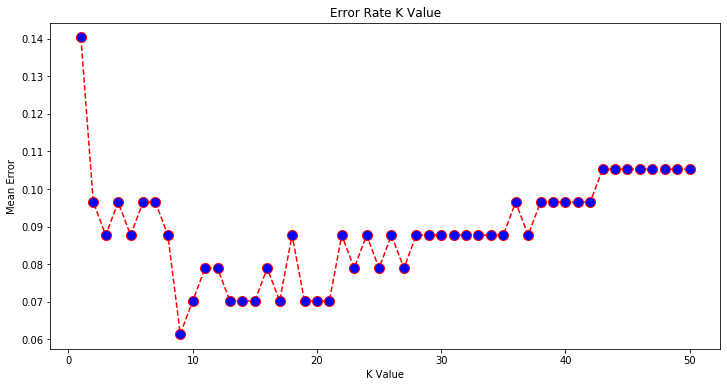

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,51), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [16]:
# creating list of K for KNN
k_list = list(range(1,51,1))
# creating list of cv scores
cv_scores = []

from sklearn.model_selection import cross_val_score

# perform 10-fold cross validdtion
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 7


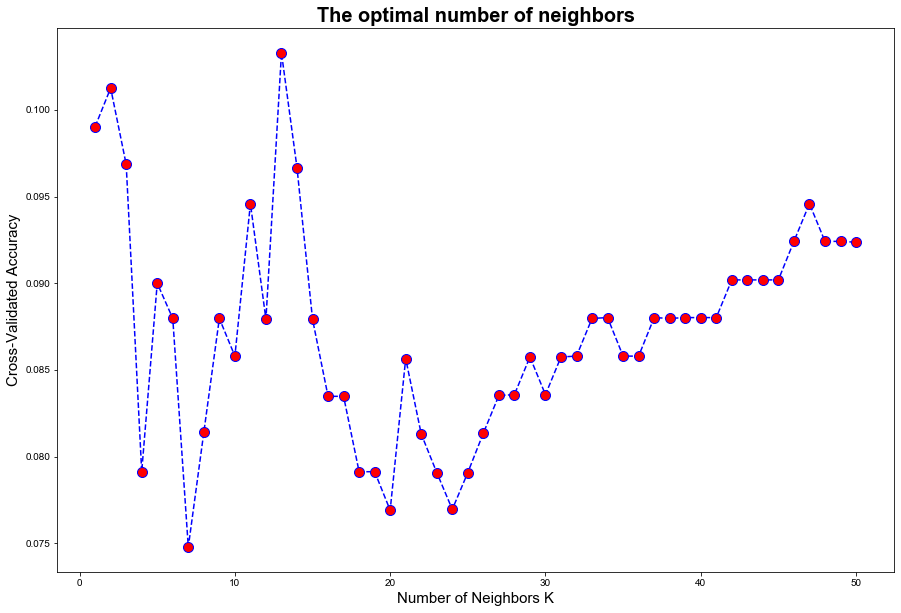

In [17]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

optimal_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is {}".format(optimal_k))

plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Cross-Validated Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE, linestyle = 'dashed', marker = 'o', markerfacecolor ='red', color = 'blue', markersize = 10)
plt.show()

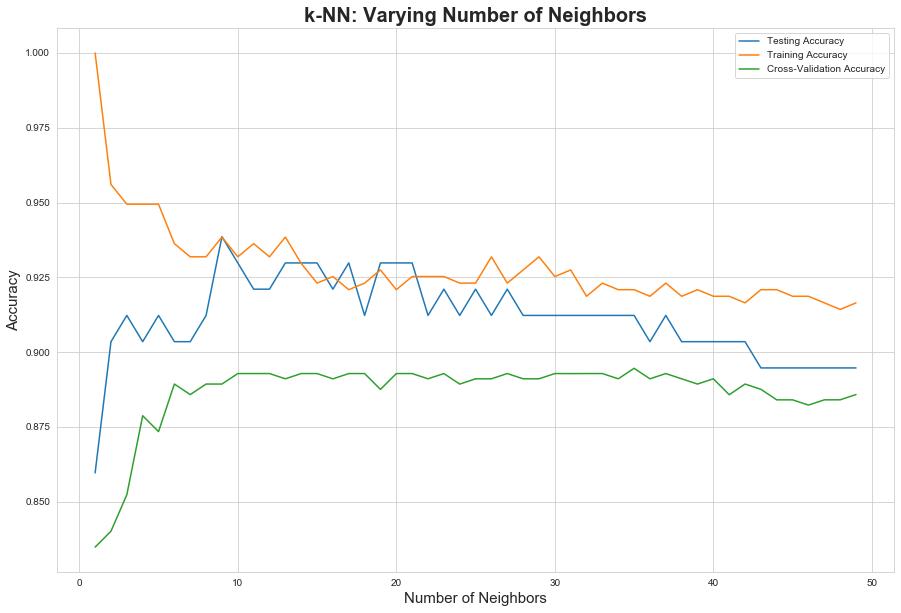

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
crossvalidation_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    crossvalidation_accuracy[i] = np.mean(cross_val_score(knn, X, y))
    
    
# Generate plot
plt.figure(figsize=(15,10))

plt.title('k-NN: Varying Number of Neighbors',fontsize=20, fontweight='bold')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, crossvalidation_accuracy , label = 'Cross-Validation Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.show()

In [38]:
#Fitting the classifer into training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

start = time.time()
classifier = KNeighborsClassifier(n_neighbors = 9,  p=2)
classifier.fit(X_train, y_train)

#Predict the test set result
y_pred = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y)
end = time.time()

accuracy_all = accuracy_score(y_test, y_pred)

from sklearn.metrics import classification_report, confusion_matrix

print("KNN Accuracy: {0:.2%}".format(accuracy_all))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



KNN Accuracy: 93.86%
Cross validation score: 88.93% (+/- 8.02%)
Execution time: 0.10642 seconds 



In [37]:

print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[71  1]
 [ 6 36]]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



## More efficient parameter tuning using GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 51))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [22]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}


In [23]:
# instantiate the grid
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, scoring='accuracy')

In [24]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                            p=2, weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29,

In [25]:


# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]



,mean_test_score,std_test_score,params
0,0.834870,0.030291,{'n_neighbors': 1}
1,0.840180,0.034514,{'n_neighbors': 2}
2,0.852352,0.010528,{'n_neighbors': 3}
3,0.878761,0.035616,{'n_neighbors': 4}
4,0.873451,0.033603,{'n_neighbors': 5}
5,0.889349,0.038146,{'n_neighbors': 6}
6,0.885825,0.037085,{'n_neighbors': 7}
7,0.889349,0.040112,{'n_neighbors': 8}
8,0.889349,0.040112,{'n_neighbors': 9}
9,0.892858,0.044764,{'n_neighbors': 10}


In [26]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.8348703617450706


In [27]:


# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)



[0.83487036 0.8401801  0.85235212 0.87876106 0.87345133 0.88934948
 0.88582518 0.88934948 0.88934948 0.89285825 0.89285825 0.89285825
 0.89110387 0.89285825 0.89285825 0.89108834 0.89285825 0.89285825
 0.88756404 0.89285825 0.89285825 0.89110387 0.89285825 0.88933395
 0.89110387 0.89110387 0.89285825 0.89110387 0.89110387 0.89285825
 0.89284273 0.89285825 0.89285825 0.89110387 0.89461264 0.89110387
 0.89285825 0.89110387 0.88934948 0.89110387 0.88579413 0.88934948
 0.88759509 0.8840708  0.8840708  0.88231641 0.8840708  0.88408632
 0.88584071 0.88759509]


Text(0, 0.5, 'Cross-Validated Accuracy')

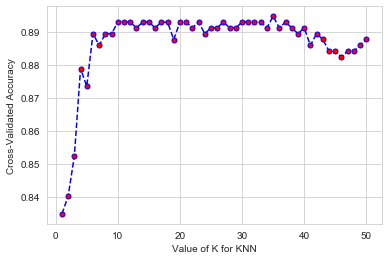

In [28]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores, linestyle = 'dashed', marker = 'o', markerfacecolor ='red', color = 'blue', markersize = 5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [29]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.8946126377891632
{'n_neighbors': 35}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')


### Searching multiple parameters simultaneously

In [30]:
# define the parameter values that should be searched
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 51))
knn = KNeighborsClassifier(n_neighbors=k_range)
weight_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan', 'minkowski']

In [31]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric = metric_options )
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [32]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, scoring='accuracy', return_train_score=True)
grid.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=[1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                            p=2, weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 

In [33]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.834870,0.030291,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
1,0.834870,0.030291,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei..."
2,0.840180,0.034514,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
3,0.834870,0.030291,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
4,0.852352,0.010528,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei..."
...,...,...,...
295,0.875299,0.040764,"{'metric': 'minkowski', 'n_neighbors': 48, 'we..."
296,0.885841,0.043205,"{'metric': 'minkowski', 'n_neighbors': 49, 'we..."
297,0.875299,0.040764,"{'metric': 'minkowski', 'n_neighbors': 49, 'we..."
298,0.887595,0.045432,"{'metric': 'minkowski', 'n_neighbors': 50, 'we..."


In [34]:
print(grid.best_params_)
print(grid.best_estimator_)

{'metric': 'euclidean', 'n_neighbors': 35, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

start = time.time()
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, scoring='accuracy')
end = time.time()

accuracy_all = []
cvs_all = []
accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 91.23%
Cross validation score: 89.46% (+/- 8.50%)
Execution time: 0.060495 seconds 

